In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# loading data set
data = pd.read_csv('housing.csv', delim_whitespace = True) # Boston Housing Prices dataset from Kaggle

# Define column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = column_names

# View the first rows of the datasets
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [3]:
# To check the shape of the dataset
data.shape

(505, 14)

In [4]:
# To check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# To get summary statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# check column names
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# check data types of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

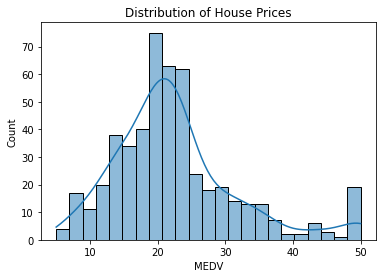

In [8]:
# Data Visualization

# Plot the distribution of house prices
sns.histplot(data['MEDV'], kde = True) # MEDV is the house price
plt.title('Distribution of House Prices')
plt.show()

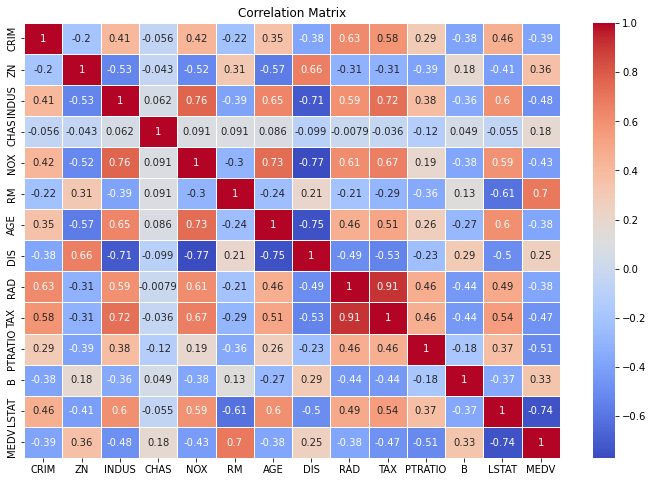

In [9]:
# Correlation Matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

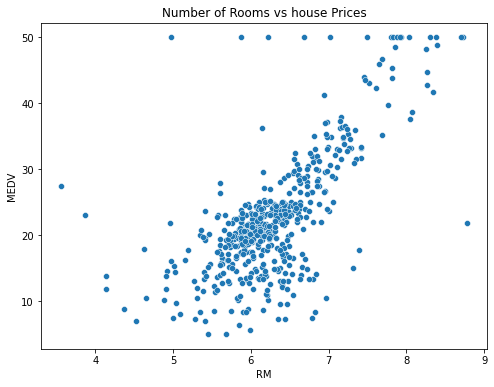

In [10]:
# Scatter Plot

plt.figure(figsize = (8,6))
sns.scatterplot(x = data['RM'], y = data['MEDV'])
plt.title('Number of Rooms vs house Prices')
plt.show()

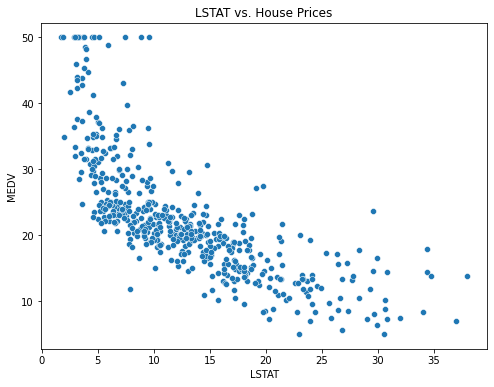

In [11]:
# Scatter plot: LSTAT vs. House prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['LSTAT'], y=data['MEDV'])
plt.title('LSTAT vs. House Prices')
plt.show()

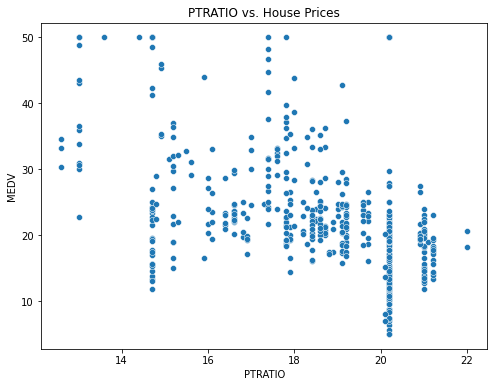

In [12]:
# Scatter plot: PTRATIO vs. House prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PTRATIO'], y=data['MEDV'])
plt.title('PTRATIO vs. House Prices')
plt.show()

In [13]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
# Feature Scaling

# Defining features and target variable
X = data.drop('MEDV', axis=1)  # Features
y = data['MEDV']               # Target (House Price)

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 50)

In [16]:
# Linear Regression

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.99544360773946


In [17]:
# Decision Trees and Random Forests

# Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 50)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f'Random Forest MSE: {mse_forest}')

Random Forest MSE: 6.901997425742568


In [18]:
# House price predicitions based on user input
# Refer housing.csv for values

user_input = {
    'CRIM': float(input("Enter the crime rate per capita: ")),
    'ZN': float(input("Enter the proportion of residential land zoned for large lots: ")),
    'INDUS': float(input("Enter the proportion of non-retail business acres: ")),
    'CHAS': float(input("Enter 1 if the property is near the Charles River, otherwise 0: ")),
    'NOX': float(input("Enter the nitric oxide concentration in ppm: ")),
    'RM': float(input("Enter the average number of rooms per property: ")),
    'AGE': float(input("Enter the proportion of properties built before 1940: ")),
    'DIS': float(input("Enter the weighted distance to Boston employment centers: ")),
    'RAD': float(input("Enter the index of accessibility to radial highways: ")),
    'TAX': float(input("Enter the full-value property tax rate per $10,000: ")),
    'PTRATIO': float(input("Enter the pupil-teacher ratio by town: ")),
    'B': float(input("Enter the proportion of Black residents: ")),
    'LSTAT': float(input("Enter the percentage of lower status population: "))
}

user_input_df = pd.DataFrame([user_input])
user_input_scaled = scaler.transform(user_input_df)
predicted_price = forest.predict(user_input_scaled)

# House Price Prediction in $1000s
print(f"The predicted house price is: ${predicted_price[0] * 1000:.2f}")

Enter the crime rate per capita: 0.04741
Enter the proportion of residential land zoned for large lots: 0.00
Enter the proportion of non-retail business acres: 11.930
Enter 1 if the tract bounds the Charles River, otherwise 0: 0
Enter the nitric oxide concentration: 0.5730
Enter the average number of rooms per dwelling: 6.0300
Enter the proportion of owner-occupied units built before 1940: 80.80
Enter the weighted distance to Boston employment centers: 2.5050
Enter the index of accessibility to radial highways: 1
Enter the full-value property tax rate per $10,000: 273.0
Enter the pupil-teacher ratio by town: 21.00
Enter the proportion of Black residents: 396.90
Enter the percentage of lower status population: 7.88
The predicted house price is: $14645.00
